In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import ParameterGrid, StratifiedKFold
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# DIY grid search 1

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print('Train size: {}'.format(X_train.shape))
print('Test size: {}'.format(X_test.shape))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(C=C, gamma=gamma)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print('Best score: {:.3f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))

Train size: (112, 4)
Test size: (38, 4)
Best score: 0.974
Best parameters: {'C': 100, 'gamma': 0.001}


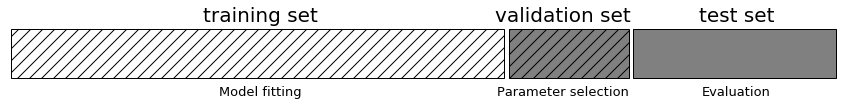

In [4]:
# Splitting strategy
mglearn.plots.plot_threefold_split()

In [5]:
# DIY grid search 2

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=1)
print('Train size: {}'.format(X_train.shape))
print('Validation size: {}'.format(X_val.shape))
print('Test size: {}'.format(X_test.shape))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(C=C, gamma=gamma)
        svm.fit(X_train, y_train)
        score = svm.score(X_val, y_val)
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'gamma': gamma}
svm = SVC(C=best_params['C'], gamma=best_params['gamma'])
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('Best parameters: {}'.format(best_params))
print('Best validation score: {:.3f}'.format(best_score))
print('Test score: {:.3f}'.format(test_score))

Train size: (84, 4)
Validation size: (28, 4)
Test size: (38, 4)
Best parameters: {'C': 10, 'gamma': 0.001}
Best validation score: 0.964
Test score: 0.921


In [6]:
# DIY grid search with cross-validation - evaluate performance of each parameter combination

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'gamma': gamma}
svm = SVC(**best_params)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('Best parameters: {}'.format(best_params))
print('Best validation score: {:.3f}'.format(best_score))
print('Test score: {:.3f}'.format(test_score))

Best parameters: {'C': 100, 'gamma': 0.01}
Best validation score: 0.973
Test score: 0.974


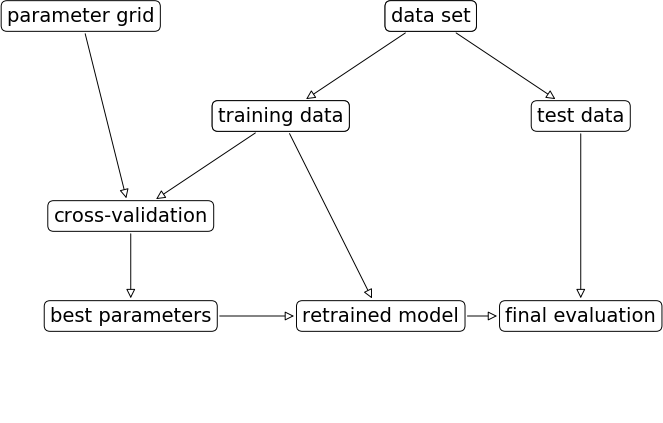

In [7]:
# Workflow
mglearn.plots.plot_grid_search_overview()

In [8]:
# sklearn GridSearch
# meta-estimator - estimator created using another estimator

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, iid=False)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

# Run CV for each combination of parameters
# Search for best parameters
# Fit internal estimator with best parameters on train data
grid_search.fit(X_train, y_train)

# Evaluate tuned parameters on test data
score = grid_search.score(X_test, y_test)
print('Test score: {:.3f}'.format(score))

print('Best parameters: {}'.format(grid_search.best_params_))
print('Best CV score: {:.3f}'.format(grid_search.best_score_))
print('Best estimator: {}'.format(grid_search.best_estimator_))

Test score: 0.974
Best parameters: {'C': 100, 'gamma': 0.01}
Best CV score: 0.973
Best estimator: SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [9]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001330,0.000010,0.000617,0.000011,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,0.363636,0.380952,0.36621,0.011365,22
1,0.001341,0.000052,0.000599,0.000040,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,0.363636,0.380952,0.36621,0.011365,22
2,0.001324,0.000036,0.000626,0.000048,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,0.363636,0.380952,0.36621,0.011365,22
3,0.001877,0.000633,0.001044,0.000799,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,0.363636,0.380952,0.36621,0.011365,22
4,0.001325,0.000117,0.000770,0.000494,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,0.363636,0.380952,0.36621,0.011365,22


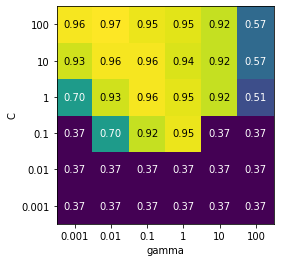

In [10]:
# Extract mean cv scores
scores = results.mean_test_score # pd series
scores = np.array(scores).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

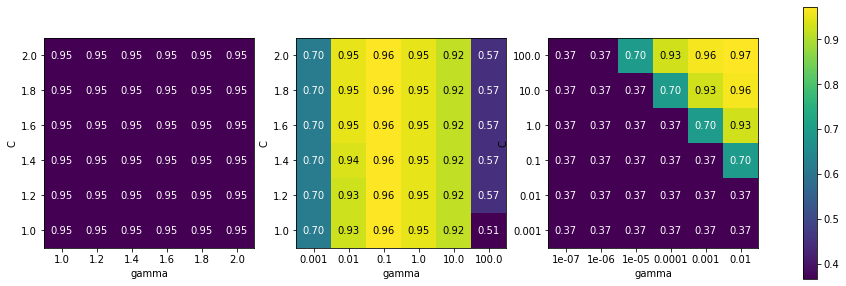

In [11]:
# Wrong settings of search grids

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))

param_grid_lin = {'C': np.linspace(1, 2, 6),
                    'gamma': np.linspace(1, 2, 6)}

param_grid_lin_log = {'C': np.linspace(1, 2, 6),
                     'gamma': np.logspace(-3, 2, 6)}

param_grid_log = {'C': np.logspace(-3, 2, 6),
                 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_lin, param_grid_lin_log, param_grid_log],
                          [ax1, ax2, ax3]):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, iid=False)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C',
                                         xticklabels=param_grid['gamma'],
                                         yticklabels=param_grid['C'],
                                         cmap='viridis', ax=ax)
    
plt.colorbar(scores_image, ax=[ax1, ax2, ax3])

In [12]:
# Conditional parameters in GridSearch

param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(SVC(), param_grid, cv=5, iid=False)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best CV score: {:.3f}'.format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV score: 0.973


In [13]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00157385,0.00209546,0.00156231,0.00123334,0.00125542,0.00122032,0.00113568,0.00113807,0.00114579,0.00113254,...,0.000659084,0.000860596,0.00147867,0.00149717,0.000861692,0.000793505,0.000703716,0.00067544,0.000681734,0.000688696
std_fit_time,0.000365559,0.000789545,0.000415353,3.58288e-05,6.32949e-05,3.25281e-05,3.33464e-05,8.6787e-06,1.82464e-05,1.16629e-05,...,2.46759e-05,1.74607e-05,5.07055e-05,1.96863e-05,2.27049e-05,1.0752e-05,1.39287e-05,1.74369e-05,2.4572e-05,3.97954e-05
mean_score_time,0.000629234,0.00119476,0.000614309,0.000600719,0.000533915,0.000507164,0.00048933,0.00048275,0.00047822,0.000478888,...,0.000399733,0.000421429,0.000474882,0.000490046,0.000423622,0.000417423,0.000399494,0.000396109,0.000398064,0.000390053
std_score_time,4.39295e-05,0.000699523,0.000109702,0.000156919,8.03157e-05,1.61987e-05,1.17525e-05,1.10667e-05,5.53501e-06,6.90278e-06,...,4.07298e-06,5.62102e-06,3.75886e-06,8.91265e-06,9.40276e-06,1.06254e-05,4.89914e-06,8.25025e-06,9.86212e-06,5.57308e-06
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.521739,0.347826,0.826087,0.913043,0.956522,1,1


In [14]:
# Nested cross-validation: split on train and test not once, but multiple splits of CV
# Just way to evaluate how model generalizes

scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
for i, sc in enumerate(scores):
    print('{} CV score: {:.3f}'.format(i + 1, sc))
print('Mean CV score: {:.3f}'.format(scores.mean()))

1 CV score: 0.967
2 CV score: 1.000
3 CV score: 0.900
4 CV score: 0.967
5 CV score: 1.000
Mean CV score: 0.967


In [15]:
# DIY nested CV

def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        test_score = clf.score(X[test_samples], y[test_samples])
        outer_scores.append(test_score)
    return np.array(outer_scores)

In [16]:
scores = nested_cv(iris.data, iris.target, StratifiedKFold(n_splits=5),
                  StratifiedKFold(n_splits=5), SVC, ParameterGrid(param_grid))
print('Nested CV scores: {}'.format(scores))

Nested CV scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
